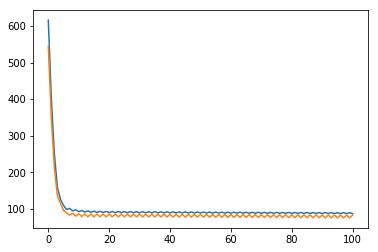

In [4]:
# %load housing2.py
#本代码用于完成机器学习实验一中线性回归的操作
#by 王松盛
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
#先读取数据集
def readData():
    x,y = load_svmlight_file('./dataset/housing.txt',13)
    x = x.toarray()
    return x,y
#切分数据集
def splitData(x,y):
    n_sample = len(y)
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)
    return X_train,y_train,X_test,y_test
#初始化模型:0初始化
def getInitData():
    w = np.array([0.0]*13)
    b = 0.0
    return w,b
#输出线性分类的结果
def linearClassifier(x,w,b):
    #print ('w',w,'x',x,'b',b)
    #input()
    return (w*x).sum()+b
#输出w和b梯度
def GetGradient1(x,y,w,b):
    wGradient = [0.0] * 13
    for i in range(len(w)):
        temp_w = np.copy(w)
        temp_w[i] += 0.0001
        wGradient[i] = (loss(x,y,temp_w,b) - loss(x,y,w,b)) / 0.0001
    bGradient = (loss(x,y,w,b+0.0001) - loss(x,y,w,b))/0.0001
    wGradient = np.array(wGradient)
    return wGradient,bGradient
#梯度下降算法
def GetGradient(x,y,w,b):
    temp_x = np.column_stack((x,np.array([1.0]*len(x)).T))
    temp_w = w.tolist() + [b]
    temp_w = np.array(temp_w)
    Grad = 2 * temp_x.T.dot(np.dot(temp_w,temp_x.T) - y)
    wGradient =np.array(Grad.tolist()[:-1])
    bGradient = Grad.tolist()[-1]
    return wGradient,bGradient
def GradientDescent(x,y,w,b,wsteplen,n_iteration):
    w_Group = [w]
    b_Group = [b]
    for i in range(n_iteration):
        w = np.copy(w)
        wGrad,bGrad = GetGradient(x,y,w,b)
       # wGrad1,bGrad1 = GetGradient1(x,y,w,b)
        #if bGrad != bGrad1:
            #print (i)
            #print (bGrad,bGrad1)
            #print (x,y,w,b)
            #input()
        temp = wGrad.tolist() + [bGrad]
        temp = np.array(temp)
        temp /= linalg.norm(temp) * wsteplen
        w -= temp[:-1]
        b -= temp[-1]
        w_Group.append(w)
        b_Group.append(b)
    return w_Group,b_Group
#计算数据集的Square loss
def loss(x,y,w,b):
    loss = 0.0
    for i in range(len(x)):
        dif = linearClassifier(x[i],w,b)-y[i]
        loss += dif * dif
    loss /= len(x)
    return loss
#主程序
def main(iteration):
    x,y = readData()
    train_x,train_y,test_x,test_y = splitData(x,y)
    w,b = getInitData()
    w_group,b_Group = GradientDescent(train_x,train_y,w,b,100,iteration)
    train_dif_Group = []
    test_dif_Group = []
    for i in range(len(w_group)):
        #print ('w',w_group[i])
        #print ('b',b_Group[i])
        train_dif_Group.append(loss(train_x,train_y,w_group[i],b_Group[i]))
        test_dif_Group.append(loss(test_x,test_y,w_group[i],b_Group[i]))
        #print (train_dif_Group[-1])
        #print (test_dif_Group[-1])
    #print (train_dif_Group)
    #print (test_dif_Group)
    plt.plot([i for i in range(iteration+1)],train_dif_Group, label = 'train_loss')
    plt.plot([i for i in range(iteration+1)], test_dif_Group, label= 'test_loss')
    plt.show()
main(100)
